In [15]:
import pandas as pd  # pandas is the library for handling tables

# Path to your CSV file
file_path = r"../data/raw_analyst_ratings.csv"

# Read the CSV into a DataFrame called df
df = pd.read_csv(file_path)

# Show the first 5 rows
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [16]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')


KeyboardInterrupt: 

In [ ]:
# Create the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to every headline
df['sentiment_score'] = df['headline'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Label the sentiment based on score
def label_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

# Show first 10 results
df[['headline', 'sentiment_score', 'sentiment_label']].head(10)


,headline,sentiment_score,sentiment_label
0,Stocks That Hit 52-Week Highs On Friday,0.000,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,0.000,Neutral
2,71 Biggest Movers From Friday,0.000,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,0.000,Neutral
4,B of A Securities Maintains Neutral on Agilent...,0.296,Positive
5,"CFRA Maintains Hold on Agilent Technologies, L...",-0.128,Negative
6,"UBS Maintains Neutral on Agilent Technologies,...",0.000,Neutral
7,Agilent Technologies shares are trading higher...,0.296,Positive
8,Wells Fargo Maintains Overweight on Agilent Te...,-0.128,Negative
9,10 Biggest Price Target Changes For Friday,0.000,Neutral


In [ ]:
df[['headline', 'sentiment_score', 'sentiment_label']].head(10)


,headline,sentiment_score,sentiment_label
0,Stocks That Hit 52-Week Highs On Friday,0.000,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,0.000,Neutral
2,71 Biggest Movers From Friday,0.000,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,0.000,Neutral
4,B of A Securities Maintains Neutral on Agilent...,0.296,Positive
5,"CFRA Maintains Hold on Agilent Technologies, L...",-0.128,Negative
6,"UBS Maintains Neutral on Agilent Technologies,...",0.000,Neutral
7,Agilent Technologies shares are trading higher...,0.296,Positive
8,Wells Fargo Maintains Overweight on Agilent Te...,-0.128,Negative
9,10 Biggest Price Target Changes For Friday,0.000,Neutral


Matplotlib is building the font cache; this may take a moment.


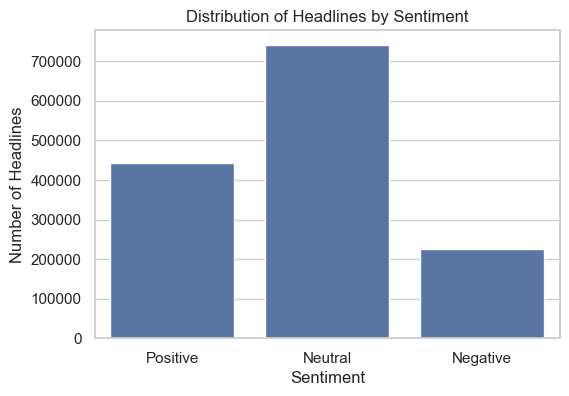

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Plot sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment_label', order=['Positive','Neutral','Negative'])
plt.title("Distribution of Headlines by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Headlines")
plt.show()


In [ ]:
# Compute headline lengths
df['headline_length'] = df['headline'].apply(lambda x: len(str(x)))

# Summary statistics
df['headline_length'].describe()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

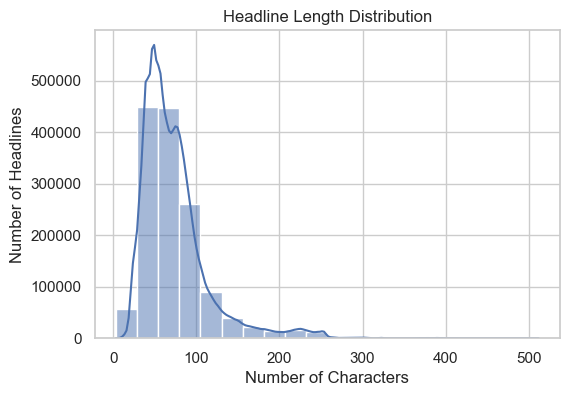

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['headline_length'], bins=20, kde=True)
plt.title("Headline Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Headlines")
plt.show()


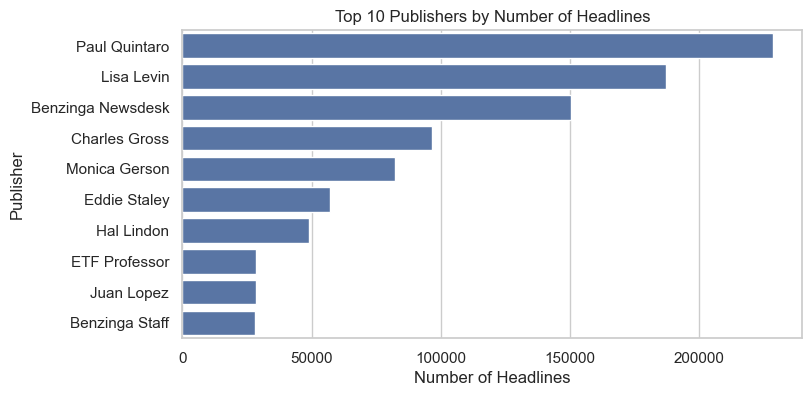

In [ ]:
# Count articles by publisher
publisher_counts = df['publisher'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=publisher_counts.values, y=publisher_counts.index)
plt.title("Top 10 Publishers by Number of Headlines")
plt.xlabel("Number of Headlines")
plt.ylabel("Publisher")
plt.show()


[nltk_data] Downloading package vader_lexicon to C:\Users\Yosef
[nltk_data]     Maregn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


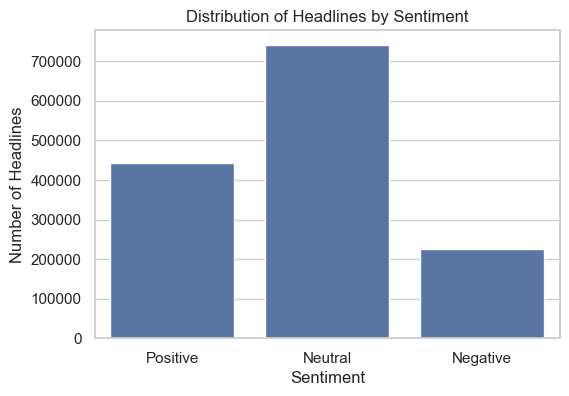

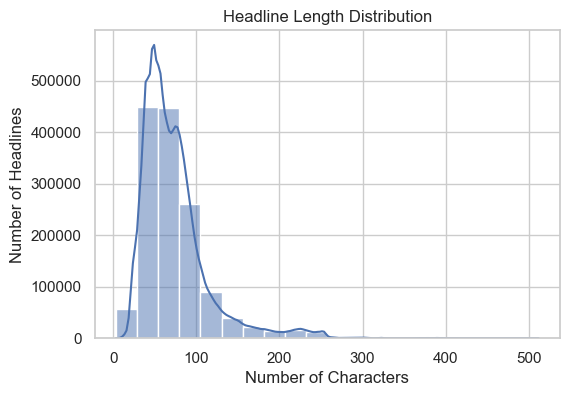

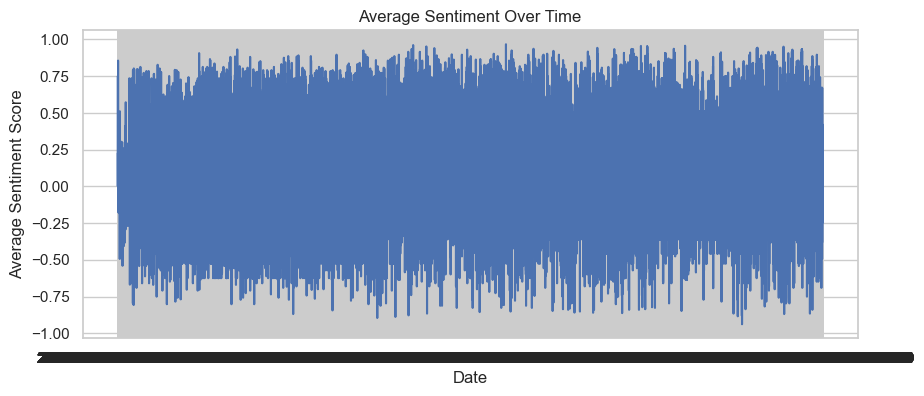

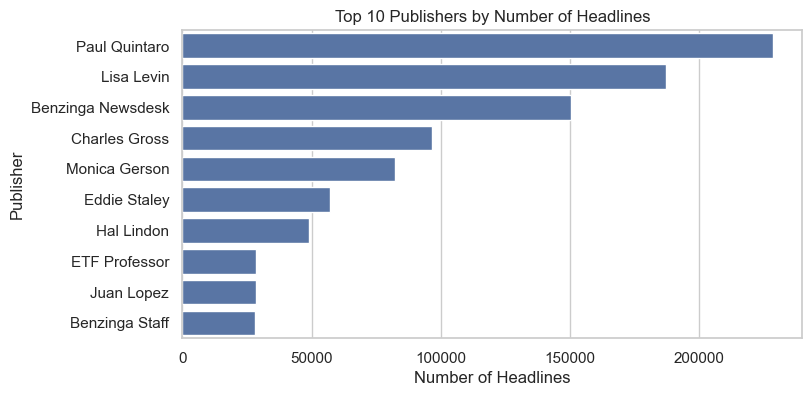

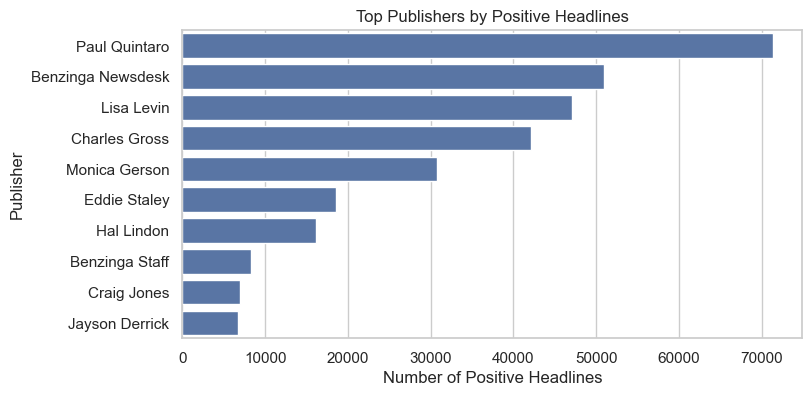

In [17]:
# ------------------------------
# Step 1: Import Libraries
# ------------------------------
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Download VADER lexicon (only once)
nltk.download('vader_lexicon')

# Create the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# ------------------------------
# Step 2: Load CSV
# ------------------------------
file_path = r"../data/raw_analyst_ratings.csv"  # adjust path if needed
df = pd.read_csv(file_path)

# Preview data
df.head()

# ------------------------------
# Step 3: Apply Sentiment Analysis
# ------------------------------
df['sentiment_score'] = df['headline'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

def label_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

# Add headline length
df['headline_length'] = df['headline'].apply(lambda x: len(str(x)))

# Preview sentiment
df[['headline', 'sentiment_score', 'sentiment_label', 'headline_length']].head(10)

# ------------------------------
# Step 4: EDA & Visualizations
# ------------------------------

# 4a: Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment_label', order=['Positive','Neutral','Negative'])
plt.title("Distribution of Headlines by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Headlines")
plt.show()

# 4b: Headline length distribution
plt.figure(figsize=(6,4))
sns.histplot(df['headline_length'], bins=20, kde=True)
plt.title("Headline Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Headlines")
plt.show()

# 4c: Sentiment over timedf['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S")

daily_sentiment = df.groupby('date')['sentiment_score'].mean()

plt.figure(figsize=(10,4))
plt.plot(daily_sentiment.index, daily_sentiment.values)
plt.title("Average Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.show()

# 4d: Top publishers by total headlines
top_publishers = df['publisher'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title("Top 10 Publishers by Number of Headlines")
plt.xlabel("Number of Headlines")
plt.ylabel("Publisher")
plt.show()

# 4e: Top publishers by positive headlines
top_positive_publishers = df[df['sentiment_label']=='Positive']['publisher'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_positive_publishers.values, y=top_positive_publishers.index)
plt.title("Top Publishers by Positive Headlines")
plt.xlabel("Number of Positive Headlines")
plt.ylabel("Publisher")
plt.show()

# ------------------------------
# Step 5: Save processed dataset
# ------------------------------
df.to_csv("../data/processed_analyst_ratings.csv", index=False)
